In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#data = "C:\Users\hELO\Downloads"
df = pd.read_csv("/content/data_productPreference - Form responses 1.csv")

In [ ]:
df.shape

(204, 10)

In [ ]:
df.head()

,Timestamp,Name,Your Age(in yrs),Gender,State you live,City,What product among the following you would prefer to buy?,It belongs to which of the following category,What's it's price range?,Additional Information you want to give regarding that product?
0,22/07/2021 01:29:43,G. Lavanya,20,Female,Delhi,South Delhi,Something to add in your closet,My personal fondness,500-2000,"Comfortable, XL cloths be the best 🌝"
1,22/07/2021 01:31:56,Bharti Arora,21,Female,Uttar Pradesh,Ghaziabad,Headphones/Earphones,Daily requirement,500-2000,Should be of good quality
2,22/07/2021 01:37:56,Kritika,19,Female,Delhi,Delhi,Headphones/Earphones,Entertainment/ Favourite Recreation,500-2000,Boat./ mivi / shullcandy
3,22/07/2021 01:38:11,Sampada Tarika,18,Female,Uttar Pradesh,Muzaffarnagar,Subscription of a streaming app,Entertainment/ Favourite Recreation,500-2000,NaN
4,22/07/2021 01:38:33,Divy,19,Male,Delhi,New Delhi,Book of your favourite genre,Entertainment/ Favourite Recreation,500-2000,"Books from Gitapress Gorakhpur, books on the r..."


In [ ]:
df.columns

Index(['Timestamp', 'Name', 'Your Age(in yrs)', 'Gender', 'State you live',
       'City', 'What product among the following you would prefer to buy?',
       'It belongs to which of the following category',
       'What's it's price range?',
       'Additional Information you want to give regarding that product?'],
      dtype='object')

In [ ]:
col_names = ['Timestamp', 'Name', 'Age(in yrs)', 'Gender', 'State','City', 'Willingness of product','Product Category','price-range', 'Additional Info']
df.columns = col_names
col_names
#df.drop(labels = ['Timestamp', 'Name', 'blabla'], axis =1) 


['Timestamp',
 'Name',
 'Age(in yrs)',
 'Gender',
 'State',
 'City',
 'Willingness of product',
 'Product Category',
 'price-range',
 'Additional Info']

In [ ]:
df.isnull().sum()

Timestamp                   0
Name                        0
Age(in yrs)                 0
Gender                      0
State                       0
City                        0
Willingness of product      0
Product Category            0
price-range                 0
Additional Info           106
dtype: int64

In [ ]:
df = df.drop(labels = ['Timestamp', 'Name', 'Additional Info'], axis =1) 
df.head()

,Age(in yrs),Gender,State,City,Willingness of product,Product Category,price-range
0,20,Female,Delhi,South Delhi,Something to add in your closet,My personal fondness,500-2000
1,21,Female,Uttar Pradesh,Ghaziabad,Headphones/Earphones,Daily requirement,500-2000
2,19,Female,Delhi,Delhi,Headphones/Earphones,Entertainment/ Favourite Recreation,500-2000
3,18,Female,Uttar Pradesh,Muzaffarnagar,Subscription of a streaming app,Entertainment/ Favourite Recreation,500-2000
4,19,Male,Delhi,New Delhi,Book of your favourite genre,Entertainment/ Favourite Recreation,500-2000


In [ ]:
col_names = ['Age(in yrs)', 'Gender', 'State','City', 'Willingness of product','Product Category','price-range']
for col in col_names:
  print(df[col].value_counts())

18    65
19    64
20    25
21    24
17     7
23     4
24     3
25     2
16     2
13     2
92     1
46     1
29     1
26     1
22     1
15     1
Name: Age(in yrs), dtype: int64
Female    139
Male       65
Name: Gender, dtype: int64
Delhi                72
Uttar Pradesh        59
West Bengal           9
Uttar Pradesh         7
Haryana               7
Rajasthan             7
Haryana               5
Madhya Pradesh        5
Delhi                 4
Bihar                 3
Uttarakhand           3
Bengaluru             2
Maharashtra           2
New Delhi             2
Jharkhand             2
Madhya Pradesh        1
Odisha                1
California            1
Tamilnadu             1
Uttar Pradesh         1
Manipur               1
Jammu And Kashmir     1
West Bengal           1
Uttar Pardesh         1
Assam, India          1
Gujarat               1
Goa                   1
Gujarat               1
Maharashtra           1
Assam                 1
Name: State, dtype: int64
New Delhi              

In [ ]:
df.describe()

,Age(in yrs)
count,204.000000
mean,19.661765
std,5.726811
min,13.000000
25%,18.000000
50%,19.000000
75%,20.000000
max,92.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age(in yrs)             204 non-null    int64 
 1   Gender                  204 non-null    object
 2   State                   204 non-null    object
 3   City                    204 non-null    object
 4   Willingness of product  204 non-null    object
 5   Product Category        204 non-null    object
 6   price-range             204 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.3+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age(in yrs)             204 non-null    int64 
 1   Gender                  204 non-null    object
 2   State                   204 non-null    object
 3   City                    204 non-null    object
 4   Willingness of product  204 non-null    object
 5   Product Category        204 non-null    object
 6   price-range             204 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.3+ KB


In [ ]:
df.isnull().sum()

Age(in yrs)               0
Gender                    0
State                     0
City                      0
Willingness of product    0
Product Category          0
price-range               0
dtype: int64

In [ ]:
df['Product Category'].value_counts()

Entertainment/ Favourite Recreation    113
My personal fondness                    73
Daily requirement                       18
Name: Product Category, dtype: int64

In [ ]:
X = df.drop(['Product Category'], axis=1)
y = df['Product Category']

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
#check the shape of X_train and X_test
X_train.shape, X_test.shape

((136, 6), (68, 6))

In [ ]:
X_train.dtypes

Age(in yrs)                int64
Gender                    object
State                     object
City                      object
Willingness of product    object
price-range               object
dtype: object

In [ ]:
X_train.head()

,Age(in yrs),Gender,State,City,Willingness of product,price-range
75,19,Female,Uttar Pradesh,Ghaziabad,Smartwatch,2000-5000
197,20,Male,Bengaluru,Karnataka,Subscription of a streaming app,2000-5000
139,18,Female,Haryana,Safidon,Laptop/PC/Tablet,5000-10000
51,19,Female,Delhi,New Delhi,Smartwatch,500-2000
122,19,Male,Madhya Pradesh,Katni,Book of your favourite genre,500-2000


In [ ]:
pip install category_encoders

In [ ]:
# import category encoders
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols = ['Age(in yrs)', 'Gender', 'State','City', 'Willingness of product', 'price-range'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_train.head()

,Age(in yrs),Gender,State,City,Willingness of product,price-range
75,1,1,1,1,1,1
197,2,2,2,2,2,1
139,3,1,3,3,3,2
51,1,1,4,4,1,3
122,1,2,5,5,4,3


In [ ]:
X_test.head()

,Age(in yrs),Gender,State,City,Willingness of product,price-range
15,3.0,2,10.0,-1.0,1.0,3
9,3.0,1,-1.0,-1.0,4.0,3
115,-1.0,2,4.0,9.0,-1.0,4
78,2.0,1,1.0,-1.0,3.0,4
66,1.0,2,12.0,28.0,7.0,3


In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
print('\nModel accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.7500


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)


array(['Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Daily requirement', 'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'E

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7353


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7353
Test set score: 0.7500


[Text(334.8, 380.52, 'X[4] <= 4.5\ngini = 0.561\nsamples = 136\nvalue = [12, 74, 50]'),
 Text(167.4, 271.8, 'X[4] <= 1.5\ngini = 0.462\nsamples = 83\nvalue = [2, 55, 26]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.391\nsamples = 15\nvalue = [0, 4, 11]'),
 Text(41.85, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.278\nsamples = 12\nvalue = [0, 2, 10]'),
 Text(251.10000000000002, 163.07999999999998, 'X[3] <= 4.5\ngini = 0.388\nsamples = 68\nvalue = [2, 51, 15]'),
 Text(209.25, 54.360000000000014, 'gini = 0.466\nsamples = 27\nvalue = [0, 17, 10]'),
 Text(292.95, 54.360000000000014, 'gini = 0.295\nsamples = 41\nvalue = [2, 34, 5]'),
 Text(502.20000000000005, 271.8, 'X[4] <= 5.5\ngini = 0.631\nsamples = 53\nvalue = [10, 19, 24]'),
 Text(418.5, 163.07999999999998, 'X[2] <= 13.5\ngini = 0.198\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 14\n

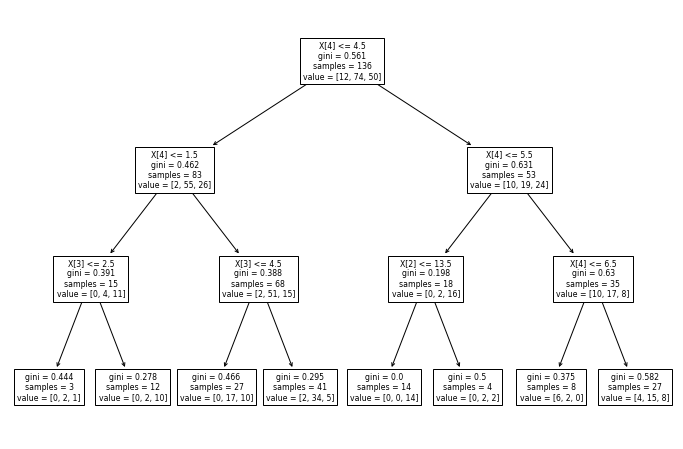

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

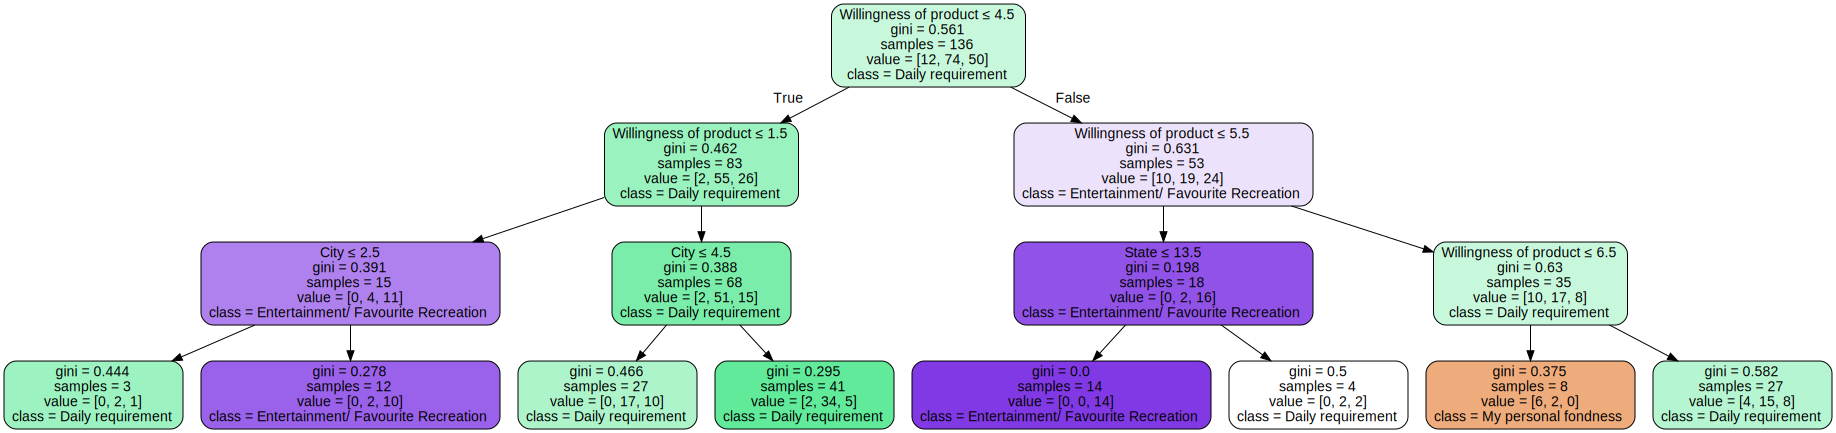

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
#printing accuracy score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7941


In [ ]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['My personal fondness', 'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Daily requirement', 'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation', 'My personal fondness',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourite Recreation',
       'Entertainment/ Favourit

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7500


In [ ]:
# print the scores on training and test set
print('\nTraining set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('\nTest set score: {:.4f}'.format(clf_en.score(X_test, y_test)))


Training set score: 0.7500

Test set score: 0.7941


[Text(334.8, 380.52, 'X[4] <= 5.5\nentropy = 1.318\nsamples = 136\nvalue = [12, 74, 50]'),
 Text(167.4, 271.8, 'X[4] <= 4.5\nentropy = 1.104\nsamples = 101\nvalue = [2, 57, 42]'),
 Text(83.7, 163.07999999999998, 'X[4] <= 1.5\nentropy = 1.047\nsamples = 83\nvalue = [2, 55, 26]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.837\nsamples = 15\nvalue = [0, 4, 11]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.942\nsamples = 68\nvalue = [2, 51, 15]'),
 Text(251.10000000000002, 163.07999999999998, 'X[2] <= 13.5\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 14]'),
 Text(292.95, 54.360000000000014, 'entropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(502.20000000000005, 271.8, 'X[4] <= 6.5\nentropy = 1.509\nsamples = 35\nvalue = [10, 17, 8]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 2.5\nentropy = 0.811\nsamples = 8\nvalue = [6, 2, 0]'),
 Text(376.65000000000003, 54.360000000000014, 'en

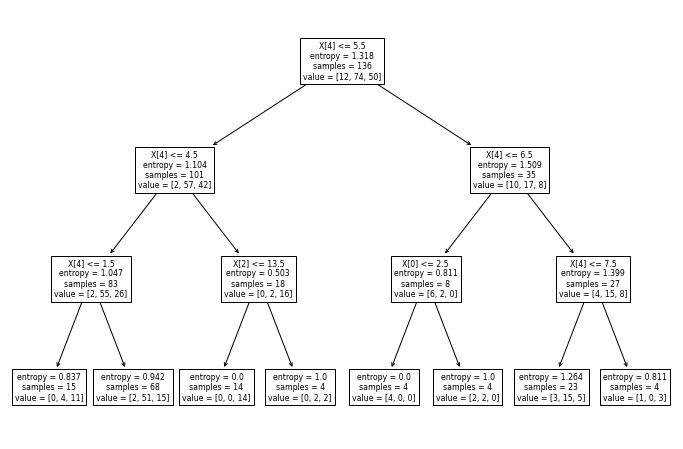

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

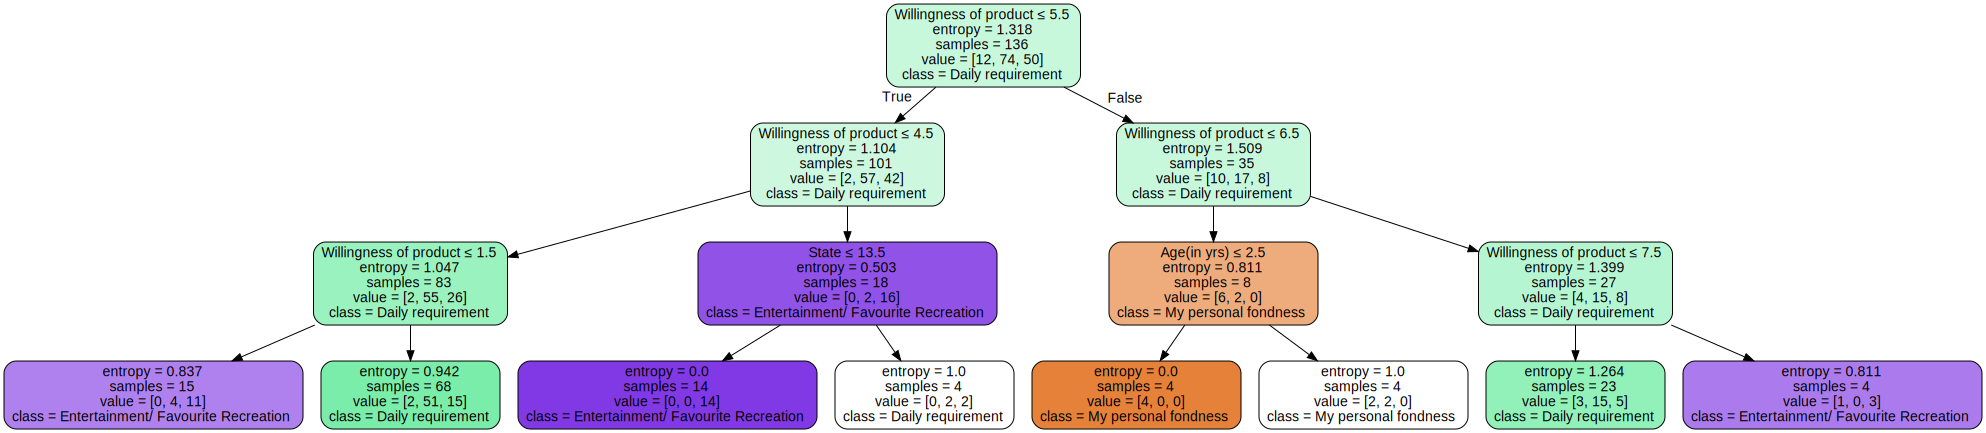

In [ ]:
#graphiz plot
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [ ]:
# Print the Confusion Matrix and slice it into four pieces
generated_matrix = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', generated_matrix)

Confusion matrix

 [[ 3  3  0]
 [ 0 37  2]
 [ 0  9 14]]


In [ ]:
print(classification_report(y_test, y_pred_en))

                                     precision    recall  f1-score   support

                  Daily requirement       1.00      0.50      0.67         6
Entertainment/ Favourite Recreation       0.76      0.95      0.84        39
               My personal fondness       0.88      0.61      0.72        23

                           accuracy                           0.79        68
                          macro avg       0.88      0.69      0.74        68
                       weighted avg       0.82      0.79      0.78        68

